This is a Jupyter notebook created for binary classification model generation.
- We will be loading the data in this notebook from SQL database.
- Perform EDA
- Perform NLP on the chat data that we have
- Feature Engineering
- Split data into training and testing datasets
- Perform model training on multiple models
- Select best performing model
- Final evaluation on the model

# Step 1 : Data Ingestion

In [27]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import pyodbc

In [28]:
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 18 for SQL Server']


Had only Sql Server. 

So had to download Visual C++ Redistributable on the VM.

(https://www.microsoft.com/en-us/download/details.aspx?id=48145&msockid=0da8057f8f2a68053435137c8eed6912)

Also downloaded ODBC Driver 18 for SQL Server which had a prequisite of Visual C++ Redistributable on the VM.

(https://learn.microsoft.com/en-us/sql/connect/odbc/download-odbc-driver-for-sql-server?view=sql-server-ver17#download-for-windows)

In [37]:
# Database details are saved in .env file and can read as 
# part of environment variables.

from dotenv import load_dotenv
import os

In [38]:
# To load the .env file
load_dotenv()

True

In [39]:
SERVER = os.getenv("SERVER")    
DATABASE = os.getenv("DATABASE")   
USERNAME = os.getenv("DB_USERNAME")
PASSWORD = os.getenv("DB_PASSWORD")

In [40]:
print(SERVER)
print(DATABASE)
print(USERNAME)
print(PASSWORD)

sql-ss.database.windows.net
CutomerChurnDB
sqladmin
June@06062025


In [52]:
conn = pyodbc.connect(
    f'DRIVER={{ODBC Driver 18 for SQL Server}};'
    f'SERVER={SERVER};'
    f'DATABASE={DATABASE};'
    f'UID={USERNAME};'
    f'PWD={PASSWORD};'
    f'TrustServerCertificate=yes;'
    f'Encrypt=yes;'
    f'Connection Timeout=40;'
)

In [53]:
query = "SELECT * FROM dbo.User_Churn"

df_orginal = pd.read_sql(query, conn)

# Close connection (optional)
conn.close()

C:\Users\Admin-Syntax-Squad\AppData\Local\Temp\ipykernel_4528\786611006.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orginal = pd.read_sql(query, conn)


In [54]:
df_orginal.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,chat_text
0,KS,128,415,False,True,25,265.100006,110,45.070000,197.399994,...,16.780001,244.699997,91,11.01,10.0,3,2.70,1,False,I've called three times and still no solution.
1,OH,107,415,False,True,26,161.600006,123,27.469999,195.500000,...,16.620001,254.399994,103,11.45,13.7,3,3.70,1,False,Why is my bill so high again?
2,NJ,137,415,False,False,0,243.399994,114,41.380001,121.199997,...,10.300000,162.600006,104,7.32,12.2,5,3.29,0,False,I'm very unhappy with your service.
3,OH,84,408,True,False,0,299.399994,71,50.900002,61.900002,...,5.260000,196.899994,89,8.86,6.6,7,1.78,2,False,This is the worst service ever.
4,OK,75,415,True,False,0,166.699997,113,28.340000,148.300003,...,12.610000,186.899994,121,8.41,10.1,3,2.73,3,False,Why is my bill so high again?


# Step 2 : EDA

In [55]:
df_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account_length          2666 non-null   int64  
 2   Area_code               2666 non-null   int64  
 3   International_plan      2666 non-null   bool   
 4   Voice_mail_plan         2666 non-null   bool   
 5   Number_vmail_messages   2666 non-null   int64  
 6   Total_day_minutes       2666 non-null   float64
 7   Total_day_calls         2666 non-null   int64  
 8   Total_day_charge        2666 non-null   float64
 9   Total_eve_minutes       2666 non-null   float64
 10  Total_eve_calls         2666 non-null   int64  
 11  Total_eve_charge        2666 non-null   float64
 12  Total_night_minutes     2666 non-null   float64
 13  Total_night_calls       2666 non-null   int64  
 14  Total_night_charge      2666 non-null   

In [56]:
df_orginal["Churn"] = df_orginal["Churn"].astype("int")
df_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account_length          2666 non-null   int64  
 2   Area_code               2666 non-null   int64  
 3   International_plan      2666 non-null   bool   
 4   Voice_mail_plan         2666 non-null   bool   
 5   Number_vmail_messages   2666 non-null   int64  
 6   Total_day_minutes       2666 non-null   float64
 7   Total_day_calls         2666 non-null   int64  
 8   Total_day_charge        2666 non-null   float64
 9   Total_eve_minutes       2666 non-null   float64
 10  Total_eve_calls         2666 non-null   int64  
 11  Total_eve_charge        2666 non-null   float64
 12  Total_night_minutes     2666 non-null   float64
 13  Total_night_calls       2666 non-null   int64  
 14  Total_night_charge      2666 non-null   

In [57]:
df_orginal.describe()

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.481620,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,0.145536
std,39.563974,42.521018,13.612277,54.210350,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,0.352707
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700001,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.399994,87.000000,24.379999,165.300003,87.000000,14.050000,166.924995,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,179.949997,101.000000,30.590000,200.899994,100.000000,17.080000,201.150002,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,0.000000
75%,127.000000,510.000000,19.000000,215.899994,114.000000,36.700001,235.100006,114.000000,19.980000,236.474998,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,50.000000,350.799988,160.000000,59.639999,363.700012,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [58]:
df_orginal.isna().sum()

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
chat_text                 0
dtype: int64

In [59]:
df_orginal.duplicated().sum()

np.int64(0)

Outcome of the EDA performed above:-
- Datatypes of the features are correctly mapped.
- Nmes of the features are have correct format.
- There is no null or NaN value in any of the features.
- There are no duplicated values in any of the features.

# Step 3 : Perform NLP on "chat_text" feature

Creating some additional features based on chat_text

In [60]:
df_copy = df_orginal.copy()

In [61]:
df_copy["chat_text_length"] = df_copy["chat_text"].str.len()
df_copy.head(3)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,chat_text,chat_text_length
0,KS,128,415,False,True,25,265.100006,110,45.070000,197.399994,...,244.699997,91,11.01,10.0,3,2.70,1,0,I've called three times and still no solution.,46
1,OH,107,415,False,True,26,161.600006,123,27.469999,195.500000,...,254.399994,103,11.45,13.7,3,3.70,1,0,Why is my bill so high again?,29
2,NJ,137,415,False,False,0,243.399994,114,41.380001,121.199997,...,162.600006,104,7.32,12.2,5,3.29,0,0,I'm very unhappy with your service.,35


Calculating average length of chat_text_length feature for user those got churned and those retained

In [63]:
df_copy["chat_text_length"].groupby(df_copy["Churn"]).mean()

Churn
0    36.157594
1    35.046392
Name: chat_text_length, dtype: float64

In [65]:
# Visualising the distribution of chat_text_length
# Create two histograms in one plot
import matplotlib.pyplot as plt
import seaborn as sns

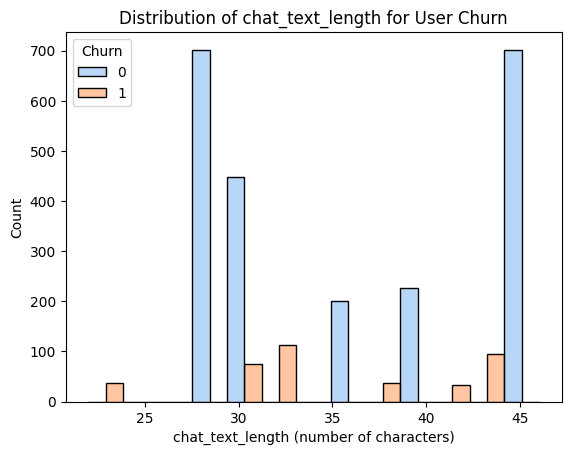

In [66]:
sns.histplot(data=df_copy, stat="count", multiple="dodge", x="chat_text_length",
             kde=False, palette="pastel", hue="Churn",
             element="bars", legend=True)
plt.xlabel("chat_text_length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of chat_text_length for User Churn")
plt.show()